# only 국민연금 가입 data

In [1]:
import pandas as pd
import numpy as np
import csv
import	koreanize_matplotlib
import matplotlib.pyplot as plt

## 국민연금 가입

In [15]:
f1 = "국민연금 가입 사업장 내역_202106.csv"
pensionDF = pd.read_csv(f1, encoding="cp949")

C:\Users\kdp\AppData\Local\Temp\ipykernel_18144\3747439663.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  pensionDF = pd.read_csv(f1, encoding="cp949")


In [16]:
pensionDF.head()

,자료생성년월(자격마감일(사유발생일이 속하는 달의 다음달 15일)까지 신고분 반영),사업장명,사업자등록번호,사업장가입상태코드 1 등록 2 탈퇴,우편번호,사업장지번상세주소,사업장도로명상세주소,고객법정동주소코드,고객행정동주소코드,법정동주소광역시도코드,...,사업장형태구분코드 1 법인 2 개인,사업장업종코드,사업장업종코드명,적용일자,재등록일자,탈퇴일자,가입자수(고지인원 수 포함),당월고지금액( 국민연금법 시행령 제5조에 의거 기준소득월액 상한액 적용으로 실제소득과 고지금액은 상이할 수 있음 상한액 2019.7.~2020.6. 4860000원(2019.7.1.기준) 상한액 2020.7.~2021.6. 5030000원(2020.7.1.기준) 상한액 2021.7.~2022.6. 5240000원(2021.7.1.기준) ),신규취득자수(납부재개 포함 전달 고지대상자와 비교하므로 실제 취득자와 상이할 수 있음(초일취득 고지 초일이 아닌경우. 미고지(다음달 취득자수에 반영)),상실가입자수(납부예외 포함 전달 고지대상자와 비교하므로 실제 퇴사자와 상이할 수 있음(초일이 아닌 상실자는 다음달 상실자수에 반영) 국민연금법 제6조 8조 동법 시행령 제18조에 의거 60세 도달하거나 퇴직연금수급자 조기노령연금 수급권을 취득한 자는 가입대상에서 제외되며 18세미만 기초수급자는 본인희망에 의해 제외될 수 있음)
0,2021-05,우성기전(주),126811,1,12816,경기도 광주시 도척면,경기도 광주시 도척면 도척윗로,4161033025,4161033025,41,...,1,292201,동력식 수지 공구 제조업,1988-01-01,NaN,NaN,5,792720,0,0
1,2021-05,서능공원묘지운영회(재),102820,1,11191,경기도 포천시 내촌면,,4165032022,4165032022,41,...,1,701700,화장터 운영 묘지 분양 및 관리업,1988-01-01,NaN,NaN,12,3235900,1,2
2,2021-05,노들새마을금고,108820,1,06923,서울특별시 동작구 노량진동,서울특별시 동작구 만양로,1159010100,1159051000,11,...,1,659202,신용조합,1988-01-01,NaN,NaN,14,4794440,0,0
3,2021-05,유창성업(주),122812,1,22849,인천광역시 서구 오류동,인천광역시 서구 갑문2로,2826011900,2826072000,28,...,1,749604,그 외 기타 분류 안된 사업 지원 서비스업(기타임가공,1988-01-01,NaN,NaN,25,5166520,0,1
4,2021-05,희성전자(주),106810,1,04410,서울특별시 용산구 한남동,서울특별시 용산구 독서당로14길,1117013100,1117067000,11,...,1,701201,비주거용 건물 임대업(점포 자기땅),1988-01-01,NaN,NaN,437,184540080,0,1


In [17]:
pensionDF.columns

Index(['자료생성년월(자격마감일(사유발생일이 속하는 달의 다음달 15일)까지 신고분 반영)', ' 사업장명', ' 사업자등록번호',
       ' 사업장가입상태코드 1 등록 2 탈퇴', ' 우편번호', ' 사업장지번상세주소', ' 사업장도로명상세주소',
       ' 고객법정동주소코드', ' 고객행정동주소코드', ' 법정동주소광역시도코드', ' 법정동주소광역시시군구코드',
       ' 법정동주소광역시시군구읍면동코드', ' 사업장형태구분코드 1 법인 2 개인', ' 사업장업종코드', ' 사업장업종코드명',
       ' 적용일자', ' 재등록일자', ' 탈퇴일자', ' 가입자수(고지인원 수 포함)',
       ' 당월고지금액( 국민연금법 시행령 제5조에 의거 기준소득월액 상한액 적용으로 실제소득과 고지금액은 상이할 수 있음  상한액 2019.7.~2020.6. 4860000원(2019.7.1.기준) 상한액 2020.7.~2021.6. 5030000원(2020.7.1.기준) 상한액 2021.7.~2022.6.  5240000원(2021.7.1.기준) )',
       ' 신규취득자수(납부재개 포함  전달 고지대상자와 비교하므로 실제 취득자와 상이할 수 있음(초일취득 고지 초일이 아닌경우. 미고지(다음달 취득자수에 반영))',
       ' 상실가입자수(납부예외 포함  전달 고지대상자와 비교하므로 실제 퇴사자와 상이할 수 있음(초일이 아닌 상실자는 다음달 상실자수에 반영) 국민연금법 제6조 8조 동법 시행령 제18조에 의거 60세 도달하거나 퇴직연금수급자 조기노령연금 수급권을 취득한 자는 가입대상에서 제외되며 18세미만 기초수급자는 본인희망에 의해 제외될 수 있음)'],
      dtype='object')

사용할 데이터 col을 뽑아보자

In [18]:
pensionDF['사업장지번상세주소'] = np.where(pensionDF[' 사업장지번상세주소'].str.strip() != '', pensionDF[' 사업장지번상세주소'], pensionDF[' 사업장도로명상세주소'])

In [19]:
pensionDF = pensionDF[[" 사업장명", " 사업장지번상세주소", " 가입자수(고지인원 수 포함)", " 당월고지금액( 국민연금법 시행령 제5조에 의거 기준소득월액 상한액 적용으로 실제소득과 고지금액은 상이할 수 있음  상한액 2019.7.~2020.6. 4860000원(2019.7.1.기준) 상한액 2020.7.~2021.6. 5030000원(2020.7.1.기준) 상한액 2021.7.~2022.6.  5240000원(2021.7.1.기준) )"]]

In [20]:
# pensionDF[" 사업장지번상세주소"].unique()
pensionDF.columns

Index([' 사업장명', ' 사업장지번상세주소', ' 가입자수(고지인원 수 포함)',
       ' 당월고지금액( 국민연금법 시행령 제5조에 의거 기준소득월액 상한액 적용으로 실제소득과 고지금액은 상이할 수 있음  상한액 2019.7.~2020.6. 4860000원(2019.7.1.기준) 상한액 2020.7.~2021.6. 5030000원(2020.7.1.기준) 상한액 2021.7.~2022.6.  5240000원(2021.7.1.기준) )'],
      dtype='object')

In [21]:
pensionDF.columns = ["사업장명", "본사주소", "가입자수", "당월고지금액"]
pensionDF.columns

Index(['사업장명', '본사주소', '가입자수', '당월고지금액'], dtype='object')

In [22]:
# pensionDF.drop(pensionDF["본사주소"] == " ")

### 주소분리

In [23]:
pensionDF.sort_values("당월고지금액")

,사업장명,본사주소,가입자수,당월고지금액
386249,주식회사바이더엠(학동지점),서울특별시 강남구 논현동,0,0
471711,로드건설주식회사/일용/운곡초등학교내진보강및외벽수선공사,충청남도 청양군 운곡면,0,0
471714,반도장식산업주식회사-(일용)위례 A3-4a블럭 공동주택 신축사업 도배공사(2공구),경기도 하남시 학암동,0,0
471718,금장건설주식회사/상용/국도1호선 나주 매성지구 등 3개소 도로정비공사,전라남도 나주시 공산면,0,0
187523,（주）제이투케이,인천광역시 서구 마전동,0,0
...,...,...,...,...
166280,엘지디스플레이(주),서울특별시 영등포구 여의도동,26440,11009314300
149675,에스케이하이닉스 주식회사,경기도 이천시 부발읍,28291,12420446400
14324,엘지전자(주),서울특별시 영등포구 여의도동,40132,17213815200
3357,현대자동차(주),서울특별시 서초구 양재동,68501,29639369740


In [24]:
addr = pd.DataFrame(pensionDF["본사주소"])
addr = addr["본사주소"].apply(lambda x : x.split()[:2])
addr =	pd.DataFrame(addr.tolist(), columns=('시도', '군구'))
addr.head()

,시도,군구
0,경기도,광주시
1,경기도,포천시
2,서울특별시,동작구
3,인천광역시,서구
4,서울특별시,용산구


In [25]:
pensionDF[["시도", "군구", "나머지 주소"]] = pensionDF["본사주소"].str.split(' ', n=2, expand=True)
pensionDF.head()

,사업장명,본사주소,가입자수,당월고지금액,시도,군구,나머지 주소
0,우성기전(주),경기도 광주시 도척면,5,792720,경기도,광주시,도척면
1,서능공원묘지운영회(재),경기도 포천시 내촌면,12,3235900,경기도,포천시,내촌면
2,노들새마을금고,서울특별시 동작구 노량진동,14,4794440,서울특별시,동작구,노량진동
3,유창성업(주),인천광역시 서구 오류동,25,5166520,인천광역시,서구,오류동
4,희성전자(주),서울특별시 용산구 한남동,437,184540080,서울특별시,용산구,한남동


In [26]:
pensionDF = pensionDF.drop("본사주소", axis = True)

In [27]:
pensionDF["시도"].unique()

array(['경기도', '서울특별시', '인천광역시', '전라북도', '충청남도', '충청북도', '강원도', '부산광역시',
       '전라남도', '울산광역시', '경상북도', '세종특별자치시', '대구광역시', '경상남도', '제주특별자치도',
       '대전광역시', '광주광역시', ''], dtype=object)

In [28]:
# pensionDF[pensionDF["시도"]==""]
pensionDF = pensionDF[pensionDF["시도"] != ""]

In [29]:
addr_aliases =	{'전라북도':'전북특별자치도'}

In [30]:
pensionDF['시도'] = pensionDF['시도'].apply(lambda	v: addr_aliases.get(v, v))

## <hr>Group Area 

In [31]:
group_area = pensionDF.groupby(["시도"]).sum(numeric_only=True)
group_area.head()

,가입자수,당월고지금액
시도,,
강원도,217219,56448848060
경기도,2379633,694971709640
경상남도,510401,144889637180
경상북도,438321,126221468040
광주광역시,196740,50966222820


In [32]:
group_area["div"] = group_area["당월고지금액"] / group_area["가입자수"]

In [33]:
group_area = group_area.sort_values("div", ascending=False)

In [34]:

# group_area = group_area.drop("황해북도")
# group_area

KeyError: "['황해북도'] not found in axis"

In [53]:
col_list = group_area.index.to_list()
company = []
color = []
for col in col_list:
    print(f"================{col}================")
    print(pensionDF[pensionDF["시도"]==col].sort_values("당월고지금액", ascending=False).head(3)["사업장명"])
    sr = pensionDF[pensionDF["시도"]==col].sort_values("당월고지금액", ascending=False).head(1)["사업장명"]
    if "광역시" in col:
        color.append("red")
    else:
        color.append("gray")
    company += sr.to_list()
    print(f"company = {company}")

================울산광역시================
412821    현대중공업주식회사
28935        근로복지공단
160060    (주)현대미포조선
Name: 사업장명, dtype: object
company = ['현대중공업주식회사']
================서울특별시================
3357        현대자동차(주)
14324        엘지전자(주)
166280    엘지디스플레이(주)
Name: 사업장명, dtype: object
company = ['현대중공업주식회사', '현대자동차(주)']
================경기도================
4586            삼성전자(주)
149675    에스케이하이닉스 주식회사
213505       삼성디스플레이(주)
Name: 사업장명, dtype: object
company = ['현대중공업주식회사', '현대자동차(주)', '삼성전자(주)']
================충청남도================
48631     현대제철주식회사당진공장
49153           코웨이(주)
106757      현대트랜시스주식회사
Name: 사업장명, dtype: object
company = ['현대중공업주식회사', '현대자동차(주)', '삼성전자(주)', '현대제철주식회사당진공장']
================경상북도================
159379        (주)포스코
11793     한국수력원자력(주)
150801        한국도로공사
Name: 사업장명, dtype: object
company = ['현대중공업주식회사', '현대자동차(주)', '삼성전자(주)', '현대제철주식회사당진공장', '(주)포스코']
================경상남도================
160377    삼성중공업(주)거제조선소
159156        대우조선해양(주)
173823         한국토지주택공사
Name:

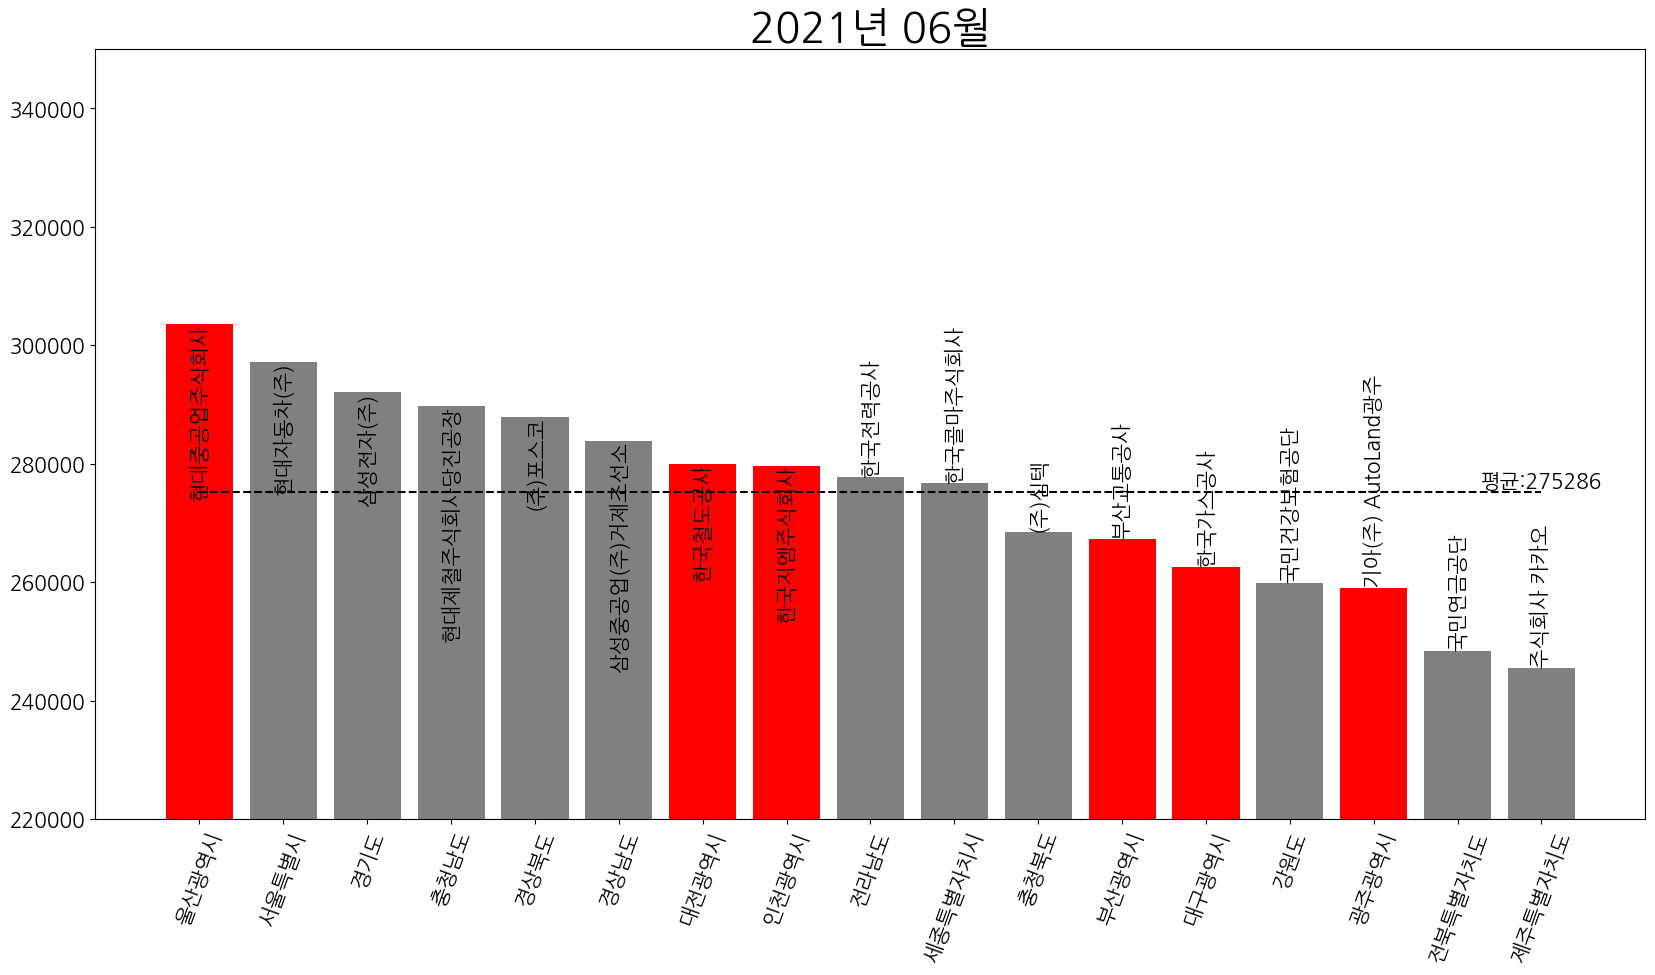

In [55]:
avg = group_area["div"].mean()
plt.figure(figsize=(20, 10))
x = group_area.index.to_list()
y = group_area["div"].to_list()

plt.plot(x, [avg]*len(x), "k--")
bar = plt.bar(x, y, color = color)


plt.xticks(rotation=70)
plt.ylim(220000, 350000)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

idx = 0

plt.title("2021년 06월", fontsize = "30")
# 숫자 넣는 부분
for rect in bar:
    height = rect.get_height()
    if idx < 8:
        plt.text(rect.get_x() + rect.get_width()/2.0, height, company[idx], ha='center', va='top', size = 15, rotation=90)
    else:    
        plt.text(rect.get_x() + rect.get_width()/2.0, height, company[idx], ha='center', va='bottom', size = 15, rotation=90)
    idx += 1

plt.text(rect.get_x() + rect.get_width()/2.0, avg, f"평균:{round(avg)}", ha='center', va='bottom', size = 15)

plt.show()

In [50]:
company

['현대중공업주식회사',
 '현대자동차(주)',
 '삼성전자(주)',
 '현대제철주식회사당진공장',
 '(주)포스코',
 '삼성중공업(주)거제조선소',
 '한국철도공사',
 '한국지엠주식회사',
 '한국전력공사',
 '한국콜마주식회사',
 '(주)심텍',
 '부산교통공사',
 '한국가스공사',
 '국민건강보험공단',
 '기아(주) AutoLand광주',
 '국민연금공단',
 '주식회사 카카오']